#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.0 MB/s 


In [ ]:
from livelossplot import PlotLossesKerasTF

#Import library

In [ ]:
#Import the necessary library

#import matplotlib.pyplot as plt
#import pandas as pd
import re
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
# import required libraries
import os
import sys
from PIL import Image
import numpy as np

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2D, Conv2DTranspose, Conv1D, MaxPool2D, Flatten
from tensorflow.keras import Model

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

#HTML txt data

In [ ]:
html_div_txt = ''' <div class="MosaicGrid-module__grid___FkDSh"><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/an-aerial-view-of-florence-italy-and-florence-cathedral-gm1205752676-347464482" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/an-aerial-view-of-florence-italy-and-florence-cathedral-picture-id1205752676?k=20&amp;m=1205752676&amp;s=612x612&amp;w=0&amp;h=Hn070U4SxWAZpvq183L-JaZuu0Mi7wsA4eMG8USx9G8=" alt="An aerial view of Florence, Italy and Florence Cathedral"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/drone-view-of-zemun-belgrade-serbia-gm1410470892-460656114" data-max-width="612" data-max-height="344" style="--width:612; --height:344;"><img src="https://media.istockphoto.com/photos/drone-view-of-zemun-belgrade-serbia-picture-id1410470892?k=20&amp;m=1410470892&amp;s=612x612&amp;w=0&amp;h=Gihen9hcFwDlTuZp5PfIO1fk8lDYMSBBlGKk5-tGk2A=" alt="Drone view of Zemun, Belgrade, Serbia."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-the-old-town-gm1187412985-335409560" data-max-width="612" data-max-height="288" style="--width:612; --height:288;"><img src="https://media.istockphoto.com/photos/sunset-over-the-old-town-picture-id1187412985?k=20&amp;m=1187412985&amp;s=612x612&amp;w=0&amp;h=VBW-YFM2DRpSv4C5g1TeqPwOJ450m6rdmaKmUolh7Ak=" alt="Sunset over the old town"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-the-temples-of-chaiyaphum-in-thailand-to-the-surrounding-mountains-at-gm1297003884-390256011" data-max-width="612" data-max-height="344" style="--width:612; --height:344;"><img src="https://media.istockphoto.com/photos/view-over-the-temples-of-chaiyaphum-in-thailand-to-the-surrounding-picture-id1297003884?k=20&amp;m=1297003884&amp;s=612x612&amp;w=0&amp;h=yHEybpX2YzLOfU0_Oeg32CGyzhzbYeD6NSEcqRsXUS0=" alt="View over the temples of Chaiyaphum in Thailand to the surrounding mountains at sunset"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-florence-italy-gm1157593714-315916879" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/sunset-over-florence-italy-picture-id1157593714?k=20&amp;m=1157593714&amp;s=612x612&amp;w=0&amp;h=ny02hfxc4nHXQHAG8Yyvj-16VaLCRz4ZIm-x-AOWNek=" alt="Sunset over Florence, Italy"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/magic-sunset-over-florence-gm1038552908-277986288" data-max-width="612" data-max-height="305" style="--width:612; --height:305;"><img src="https://media.istockphoto.com/photos/magic-sunset-over-florence-picture-id1038552908?k=20&amp;m=1038552908&amp;s=612x612&amp;w=0&amp;h=yeQIvjfMjc_LGC-KnCarWOd4pRfFLf8C_udJL6ttGps=" alt="Magic sunset over Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/nice-sunset-from-the-heights-of-the-city-of-madrid-gm1137342242-303262786" data-max-width="408" data-max-height="612" style="--width:408; --height:612;"><img src="https://media.istockphoto.com/photos/nice-sunset-from-the-heights-of-the-city-of-madrid-picture-id1137342242?k=20&amp;m=1137342242&amp;s=612x612&amp;w=0&amp;h=j47nuk7kcj8ZYcFDxSOb7grnl2P6SBlQ-Nxn4ObO0Fw=" alt="Nice sunset from the heights of the city of Madrid"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/mosque-through-the-sunset-qasimi-mosque-view-from-the-roof-in-nuba-village-at-hebron-gm1272863211-375012838" data-max-width="612" data-max-height="411" style="--width:612; --height:411;"><img src="https://media.istockphoto.com/photos/mosque-through-the-sunset-qasimi-mosque-view-from-the-roof-in-nuba-picture-id1272863211?k=20&amp;m=1272863211&amp;s=612x612&amp;w=0&amp;h=HKpA6LBMdCTGevc4pqFhD5NN_Ra5f9Ijep43OPNa7IY=" alt="Mosque Through the Sunset. Qasimi Mosque view from the roof in Nuba village at Hebron, Palestine . HDR Mosque"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/aerial-view-of-sunset-above-european-city-gm1170236115-323747786" data-max-width="612" data-max-height="612" style="--width:612; --height:612;"><img src="https://media.istockphoto.com/photos/aerial-view-of-sunset-above-european-city-picture-id1170236115?k=20&amp;m=1170236115&amp;s=612x612&amp;w=0&amp;h=VnRVcJD5fCHWfl05xx7514-gukN8hpa8xbMeJQsdKOc=" alt="aerial view of sunset above european city"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-of-bratislava-st-martins-cathedral-from-castle-in-the-morning-gm1178176604-329198693" data-max-width="612" data-max-height="309" style="--width:612; --height:309;"><img src="https://media.istockphoto.com/photos/view-of-bratislava-st-martins-cathedral-from-castle-in-the-morning-picture-id1178176604?k=20&amp;m=1178176604&amp;s=612x612&amp;w=0&amp;h=HEyJ5lVFUS6jiBH059esKBLW-_of9aBGvD91hS1Q32o=" alt="View of Bratislava St. Martin's cathedral from castle in the morning."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/jamaa-el-fna-market-square-with-koutoubia-mosque-marrakesh-morocco-gm1199709725-343359540" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/jamaa-el-fna-market-square-with-koutoubia-mosque-marrakesh-morocco-picture-id1199709725?k=20&amp;m=1199709725&amp;s=612x612&amp;w=0&amp;h=erUgktLi34cLFgyBYa5j1sCO23Ewqw3m2ZUp8Hx96Jg=" alt="Jamaa el Fna market square with Koutoubia mosque, Marrakesh, Morocco"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-florence-gm1226301319-361271669" data-max-width="612" data-max-height="405" style="--width:612; --height:405;"><img src="https://media.istockphoto.com/photos/sunset-over-florence-picture-id1226301319?k=20&amp;m=1226301319&amp;s=612x612&amp;w=0&amp;h=9dJGWPde2TxKIlT87QfQmbpiQRKdmqaUTtuQx0aAP2k=" alt="Sunset over Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/malaysia-mosque-with-muslim-pray-in-malaysia-gm1156855780-315453950" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/malaysia-mosque-with-muslim-pray-in-malaysia-picture-id1156855780?k=20&amp;m=1156855780&amp;s=612x612&amp;w=0&amp;h=RvNsKGqCmJYNiU2GTULUCfTKUCrQJBjfu6H7IFXUbvc=" alt="Malaysia Mosque with Muslim pray in Malaysia"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-the-city-of-augsburg-gm1392547369-448750367" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/view-over-the-city-of-augsburg-picture-id1392547369?k=20&amp;m=1392547369&amp;s=612x612&amp;w=0&amp;h=-EQpjSF3XFMdibbTB0RkRQ4WdqhHhlXZ1kIm50CBNP0=" alt="View over  the city of Augsburg"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/the-tall-pagoda-gm627681028-111211675" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/the-tall-pagoda-picture-id627681028?k=20&amp;m=627681028&amp;s=612x612&amp;w=0&amp;h=l5eeai-y1B_x8u3pakvEHTasOsLfvJEcmYKHliE9ne4=" alt="the tall pagoda"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/skyline-kiev-city-with-beautiful-morning-sky-pedestrian-bridge-left-bank-the-dnieper-gm1188850124-336383263" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/skyline-kiev-city-with-beautiful-morning-sky-pedestrian-bridge-left-picture-id1188850124?k=20&amp;m=1188850124&amp;s=612x612&amp;w=0&amp;h=kSNOhs4iDuWRZl8RmlooYEojkqrPILgaWIoLjXAM3qA=" alt="Skyline, Kiev city with beautiful morning sky. Pedestrian bridge. Left bank the Dnieper River."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/genova-at-sunset-gm836319700-136030785" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/genova-at-sunset-picture-id836319700?k=20&amp;m=836319700&amp;s=612x612&amp;w=0&amp;h=75myRFGqDLeDX0QPIWPkPvw98jClbErpGNY87ghpK5Q=" alt="Genova at sunset"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/florence-panorama-gm664497770-120958933" data-max-width="612" data-max-height="292" style="--width:612; --height:292;"><img src="https://media.istockphoto.com/photos/florence-panorama-picture-id664497770?k=20&amp;m=664497770&amp;s=612x612&amp;w=0&amp;h=ZNqHX7gmoYrtrwhAlB4YyRDj5O6XIf740JIw7HnVhx4=" alt="Florence Panorama"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/arno-river-and-ponte-vecchio-at-sunset-florence-gm500887591-42979886" data-max-width="612" data-max-height="243" style="--width:612; --height:243;"><img src="https://media.istockphoto.com/photos/arno-river-and-ponte-vecchio-at-sunset-florence-picture-id500887591?k=20&amp;m=500887591&amp;s=612x612&amp;w=0&amp;h=rK_1I1cA04IbvgLeL4dDxG9FUTQpOi3_g9oz1WEJh7Q=" alt="Arno River and Ponte Vecchio at sunset, Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/winter-sunset-over-tobolsk-gm1296960101-390225844" data-max-width="612" data-max-height="417" style="--width:612; --height:417;"><img src="https://media.istockphoto.com/photos/winter-sunset-over-tobolsk-picture-id1296960101?k=20&amp;m=1296960101&amp;s=612x612&amp;w=0&amp;h=2MyT8B_ytSggEGKxkY1FfQ3YaVMLZgh2azOXYT-jeLc=" alt="Winter sunset over Tobolsk"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/church-gm912363162-251174119" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/church-picture-id912363162?k=20&amp;m=912363162&amp;s=612x612&amp;w=0&amp;h=4OgQtksUqeLO73jvOc_Mgmw2LI1GQ7jls0-bQNtX6D4=" alt="Church"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-terrazza-del-pincio-in-rome-at-italy-gm1326102199-410914230" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/view-terrazza-del-pincio-in-rome-at-italy-picture-id1326102199?k=20&amp;m=1326102199&amp;s=612x612&amp;w=0&amp;h=E6SfYeXOmk22Lc3d0zl12eG_svn4F9adE7H-8wkS4rU=" alt="View Terrazza Del Pincio In Rome At Italy"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/beautiful-sunset-in-verona-veneto-region-italy-gm901614046-248735413" data-max-width="405" data-max-height="612" style="--width:405; --height:612;"><img src="https://media.istockphoto.com/photos/beautiful-sunset-in-verona-veneto-region-italy-picture-id901614046?k=20&amp;m=901614046&amp;s=612x612&amp;w=0&amp;h=gnd2YvuTstXFYQCv4pA-8DLmOQ_YA7_aAttIUTLfT4o=" alt="Beautiful sunset in Verona, Veneto region, Italy."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-florence-from-piazzale-michelangelo-gm687360854-126336249" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/view-over-florence-from-piazzale-michelangelo-picture-id687360854?k=20&amp;m=687360854&amp;s=612x612&amp;w=0&amp;h=2U8zMJ_Tz9-Whb6hTgKNFerZtsIzxUYGHRyN5fn8PLo=" alt="View over Florence from Piazzale Michelangelo"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/florence-the-capital-of-tuscany-gm933853270-255767655" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/florence-the-capital-of-tuscany-picture-id933853270?k=20&amp;m=933853270&amp;s=612x612&amp;w=0&amp;h=rgS7jfUPTGN5lBucO_sHTjv102IgVxW0QPQJpXxRzec=" alt="Florence - The capital of Tuscany"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/beautiful-sunset-above-voronezh-city-gm923900514-253588764" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/beautiful-sunset-above-voronezh-city-picture-id923900514?k=20&amp;m=923900514&amp;s=612x612&amp;w=0&amp;h=G87ypNCKXTm2ugXWDx7Z5ZJ3uBTEcItkESbWxs-_utU=" alt="Beautiful sunset above Voronezh city"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/city-by-the-sea-at-sunrise-vinitsa-bulgaria-gm1309896335-399469035" data-max-width="612" data-max-height="191" style="--width:612; --height:191;"><img src="https://media.istockphoto.com/photos/city-by-the-sea-at-sunrise-vinitsa-bulgaria-picture-id1309896335?k=20&amp;m=1309896335&amp;s=612x612&amp;w=0&amp;h=gZ7Y92MaeTe_lfO_iqacHNQWXRndUPwozCO834Y2IvQ=" alt="City by the Sea at Sunrise Vinitsa, Bulgaria"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/aerial-view-of-the-monument-motherland-shrouded-in-thick-fog-at-dawn-kiev-ukraine-gm1188850505-336383647" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/aerial-view-of-the-monument-motherland-shrouded-in-thick-fog-at-dawn-picture-id1188850505?k=20&amp;m=1188850505&amp;s=612x612&amp;w=0&amp;h=7LVOnitKQe4SkWsvvYP-29YCm2id_2GWDIomD2B-yzI=" alt="Aerial view of the Monument Motherland, shrouded in thick fog at dawn, Kiev, Ukraine. The concept of the apocalyptic doomsday."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunrise-or-sunset-over-the-rooftops-of-rome-gm829904894-134974697" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/sunrise-or-sunset-over-the-rooftops-of-rome-picture-id829904894?k=20&amp;m=829904894&amp;s=612x612&amp;w=0&amp;h=WjNt0uwvBddJejmb9zN6wTTAoss4HTOpYrVK5fidTVg=" alt="Sunrise or sunset over the rooftops of Rome"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/search/search-by-asset?assetid=1066139134&amp;assettype=image" data-max-width="612" data-max-height="395" style="--width:612; --height:395;"><div class="Overlay-module__overlay___vpiF7" data-testid="mosaic-grid-overlay"></div><div class="Overlay-module__overlayText___OM41u"><div class="Overlay-module__count___hP7sy">+12455</div><div class="Overlay-module__media___OyqRg">Similar images</div></div><img src="https://media.istockphoto.com/photos/panoramic-view-of-hamburg-city-picture-id684763938?k=20&amp;m=684763938&amp;s=612x612&amp;w=0&amp;h=nYxTW9oVlSqFczo_vjUi3FYqKouE_9uqGpx5sWwP8iM=" alt="panoramic view of Hamburg city"></a></div> '''

In [ ]:
#Provide the url for web scraping
url = "https://www.istockphoto.com/photo/sunrise-in-chisinau-moldova-republic-gm1066139134-285097855"
base_url = "https://www.istockphoto.com/photo/"

#Data aquisition

##Get image link from html doc

In [ ]:
soup_test = BeautifulSoup(html_div_txt, 'html.parser')

In [ ]:
images = soup_test.select('div img')

In [ ]:
lst_img_url = []
for image_url in images:
  lst_img_url.append(image_url['src'])

##Create png image

In [ ]:
i = 0
for img_url in lst_img_url:
  img_data = requests.get(img_url).content
  name_img_file = 'name_{}.png'.format(i)
  i += 1
  with open(name_img_file, 'wb') as handler:
    handler.write(img_data)

In [ ]:
test_img_100x100 = 'https://www.kindpng.com/picc/m/182-1823427_100-100-pixel-hd-png-download.png'

In [ ]:
img_data = requests.get(test_img_100x100).content
name_img_file = 'test_img_100x100.png'.format(i)
with open(name_img_file, 'wb') as handler:
  handler.write(img_data)

##Compres image

In [ ]:
# define a function for
# compressing an image
def compressMe(file, verbose = False):
    # open the image
    picture = Image.open(file)

    # Save the picture with desired quality
    # To change the quality of image,
    # set the quality variable at
    # your desired level, The more
    # the value of quality variable
    # and lesser the compression
    picture.save("Compressed_"+file,
                 "JPEG",
                 optimize = True,
                 quality = 10)

In [ ]:
i = 0
for img_url in lst_img_url:
  name_img_file = 'name_{}.png'.format(i)
  i += 1
  compressMe(name_img_file, verbose = False)

#Data manipulation

In [ ]:
def imgToArray(name_img):
  img_data = Image.open(name_img).convert('RGB')
  img_arr = np.array(img_data)
  return img_arr

def arrayToImg(data, name):
  im = Image.fromarray(data)
  im.save(name + ".png")


def arrMultiplyBy(data, split_hight, split_width):
  hight, width, chanel = data.shape
  if ((hight % split_hight) != 0):
    hight = int(hight / split_hight) * split_hight
    data = data[:hight]
  if ((width % split_width) != 0):
    width = int(width / split_width) * split_width
    data = data[:,:width]
  return data

def splitArrayToBlock(data, split_high, split_width):
  high, width, channel = data.shape
  lst_data = []
  arr_high_step  = np.arange(0, high, split_high)
  arr_width_step = np.arange(0, width, split_width)
  arr_high_block  = np.arange(split_high)
  for i in arr_high_step:
    for j in arr_width_step:
      lst_tmp_line = []
      for k in arr_high_block:
        x = data[i+k][j:j+split_width]
        lst_tmp_line.append(x)
      #print('len lst {}, size arr {}'.format(len(lst_tmp_line), lst_tmp_line[0].shape))
      lst_data.append(np.array(lst_tmp_line))

  #print(lst_data[0].shape)
  return np.array(lst_data), (high, width, channel)

def joinBlockToArray(data, split_high, split_width, size):
  high, width, channel = size
  lst_data = []
  nbr_high_blockS  = int(high / split_high)
  nbr_width_blockS = int(width / split_width)
  data = data.reshape(nbr_high_blockS, nbr_width_blockS, split_high, split_width, channel)
  arr_high_idxS  = np.arange(nbr_high_blockS)
  arr_width_idxS = np.arange(nbr_width_blockS)
  arr_high_block  = np.arange(split_high)

  for i in arr_high_idxS:
    for k in arr_high_block:
      lst_tmp_line = []
      for j in arr_width_idxS:
        x = data[i][j][k]
        lst_tmp_line.append(x)
      lst_data.append(np.array(lst_tmp_line))

  return np.array(lst_data).reshape(high, width, channel)


In [ ]:
def getVecBlocks(nbr_img, prefix_name, suffix_name, split_high, split_width):
  i = 0
  tmp_arr = np.zeros(1* split_high* split_width* 3).reshape(1, split_high, split_width, 3)
  while(i < nbr_img):
    name_img_file = prefix_name + str(i) + suffix_name
    arr = imgToArray(name_img_file)
    #print('imgToArray  = {}'.format(arr.shape))
    arr = arrMultiplyBy(arr, split_high, split_width)
    #print('arrMultiplyBy  = {}'.format(arr.shape))
    arr, _ = splitArrayToBlock(arr, split_high, split_width)
    #print('splitArrayToBlock  = {}'.format(arr.shape))
    tmp_arr = np.concatenate((tmp_arr, arr), axis=0)
    #print('tmp_arr.shape = ', tmp_arr.shape)
    i += 1
  return tmp_arr


In [ ]:
lst_img_url = [test_img_100x100, test_img_100x100]
prefix_name, suffix_name = 'name_', '.png'
split_high, split_width = 16, 16

In [ ]:
lst_block_Y = getVecBlocks(30, prefix_name, suffix_name, split_high, split_width)

In [ ]:
prefix_name, suffix_name = 'Compressed_name_', '.png'
lst_block_X = getVecBlocks(30, prefix_name, suffix_name, split_high, split_width)

In [ ]:
lst_block_Y.shape

(26335, 16, 16, 3)

In [ ]:
lst_block_X.shape

(26335, 16, 16, 3)

#Model

In [ ]:
class Correction(Model):
  def __init__(self, hight, width, channel):
    size_array = hight * width * channel
    self.input_layer = Input(shape=(hight, width, channel),
    name="Correction",
    dtype=np.float32,
    )
    h1_layer_e = Conv2D(16, (3, 3), activation='relu')(self.input_layer)
    self.encoder = Conv2D(8, (3, 3), activation='relu')(h1_layer_e)

    h1_layer_d = Conv2DTranspose(8, kernel_size=3, activation='relu')(self.encoder)
    h2_layer_d = Conv2DTranspose(16, kernel_size=3, activation='relu')(h1_layer_d)
    flatten_layer = Flatten()(h2_layer_d)
    decoder_layer = Dense(size_array, activation="sigmoid")(flatten_layer)
    self.decoder  = Reshape((hight, width, channel), input_shape=(size_array,))(decoder_layer)

  def getEncoder(self):
    return Model(self.input_layer, self.encoder)

  def getDecoder(self):
    return Model(self.encoder, self.decoder)

  def getAutoencoder(self):
    return Model(self.input_layer, self.decoder)

In [ ]:
hight, width, channel = 16, 16, 3
model_corection = Correction(hight, width, channel)

In [ ]:
correction = model_corection.getAutoencoder()

In [ ]:
correction.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Correction (InputLayer)     [(None, 16, 16, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 8)         1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 16)       1168      
 ranspose)                                                       
                                                                 
 flatten (Flatten)           (None, 4096)              0     

In [ ]:
correction.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lst_block_X, lst_block_Y = lst_block_X / 255., lst_block_Y / 255.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(lst_block_X, lst_block_Y, test_size=0.33, random_state=42)

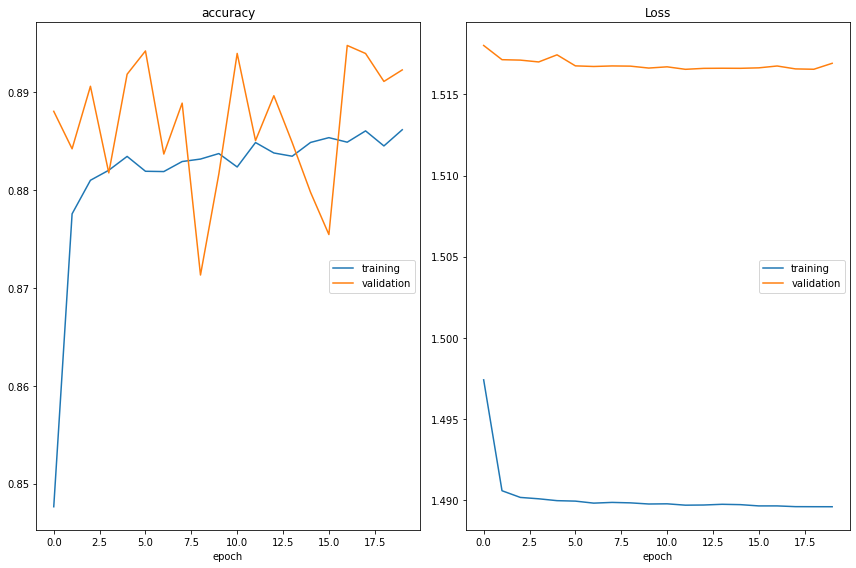

accuracy
	training         	 (min:    0.848, max:    0.886, cur:    0.886)
	validation       	 (min:    0.871, max:    0.895, cur:    0.892)
Loss
	training         	 (min:    1.490, max:    1.497, cur:    1.490)
	validation       	 (min:    1.517, max:    1.518, cur:    1.517)
177/177 [==============================] - 22s 125ms/step - loss: 1.4896 - accuracy: 0.8862 - val_loss: 1.5169 - val_accuracy: 0.8923


In [ ]:
correction.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=20,
          batch_size=100,
          callbacks=[PlotLossesKerasTF()]
          )

In [ ]:
split_high, split_width = 16, 16
name_img_file = 'Compressed_name_0.png'
arr_img = imgToArray(name_img_file)
arr_16 = arrMultiplyBy(arr_img, split_high, split_width)
del arr_img
lst_block_img, size_r = splitArrayToBlock(arr_16, split_high, split_width)
del arr_16
lst_block_img = lst_block_img / 255.

In [ ]:
lst_block_pred = correction.predict(lst_block_img)

In [ ]:
lst_block_pred.shape

(950, 16, 16, 3)

In [ ]:
arr_img = joinBlockToArray(lst_block_pred, split_high, split_width, size_r)
arr_img = arr_img * 255. + 0.5

In [ ]:
size_r

(400, 608, 3)

In [ ]:
arr_img = np.array(arr_img, dtype=np.uint8)

In [ ]:
name = 'predict_0.png'
arrayToImg(arr_img, name)